# <font style="color:rgb(50,120,229)">Read and display a Video in OpenCV</font>

Just like we used [**`cv2.imread`**](https://docs.opencv.org/4.1.0/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) to read an image stored on our machine, we will use **`cv2.VideoCapture`** to create a [**VideoCapture**](https://docs.opencv.org/4.1.0/d8/dfe/classcv_1_1VideoCapture.html#ac4107fb146a762454a8a87715d9b7c96) object and read from input file (video).

### <font style="color:rgb(8,133,37)">Function Syntax </font>

``` python
<VideoCapture object>	=	cv.VideoCapture(		)
<VideoCapture object>	=	cv.VideoCapture(	filename[, apiPreference]	)
<VideoCapture object>	=	cv.VideoCapture(	index[, apiPreference]	)

```

**Parameters**

- **`filename`** it can be:
    - name of video file (eg. video.avi)
    - or image sequence (eg. img_%02d.jpg, which will read samples like img_00.jpg, img_01.jpg, img_02.jpg, ...)
    -or URL of video stream (eg. protocol://host:port/script_name?script_params|auth). Note that each video stream or IP camera feed has its own URL scheme. Please refer to the documentation of source stream to know the right URL.
- **`apiPreference`**:	preferred Capture API backends to use. Can be used to enforce a specific reader implementation if multiple are available: e.g. cv::CAP_FFMPEG or cv::CAP_IMAGES or cv::CAP_DSHOW.

## <font style="color:rgb(50,120,229)">Create a video reader object </font>
```python
cap = cv2.VideoCapture(args)
```

Three most popular ways of reading videos using the VideoCapture Object are :
1. Using Webcam ( Pass the argument as 0 )
2. From a video File ( Specify the filename as argument )
3. Image sequence ( e.g. image_%03d.jpg )

#### <font style="color:rgb(200,0,0)">NOTE for Webcam</font>

In most cases, only one camera is connected to the system. So, all we do is pass **`0`** and OpenCV uses the only camera attached to the computer. When more than one camera is connected to the computer, we can select the second camera by passing **`1`**, the third camera by passing **`2`** and so on.

In [1]:
# Import module
import cv2
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
cap = cv2.VideoCapture(DATA_PATH+'videos/chaplin.mp4')

In [4]:
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

## <font style="color:rgb(50,120,229)">How to read frames? </font>
For reading the video frames, we use the **`cap.read`** function which returns a tuple where the first element is a return value and the second element is the frame. We also use additional functions like **`cap.isOpened()`** to check if the camera or the video file has opened correctly.

In [5]:
ret, frame = cap.read()

## <font style="color:rgb(50,120,229)">Display the Video</font>
After reading a video file, we can display the video frame by frame. A frame of a video is simply an image and we display each frame the same way we display images, i.e., we use the function **`cv2.imshow()`**.

Usually, you would use your local system while working with videos instead of Jupyter Notebooks. But since, everything is covered in both modes, we will describe how to display the read frames in two ways. 

1. Using matplotlib imshow on the Notebook itself.
1. Using cv2.imshow in the Local python script

## <font style="color:rgb(50,120,229)">Display the frame using Matplotlib </font>

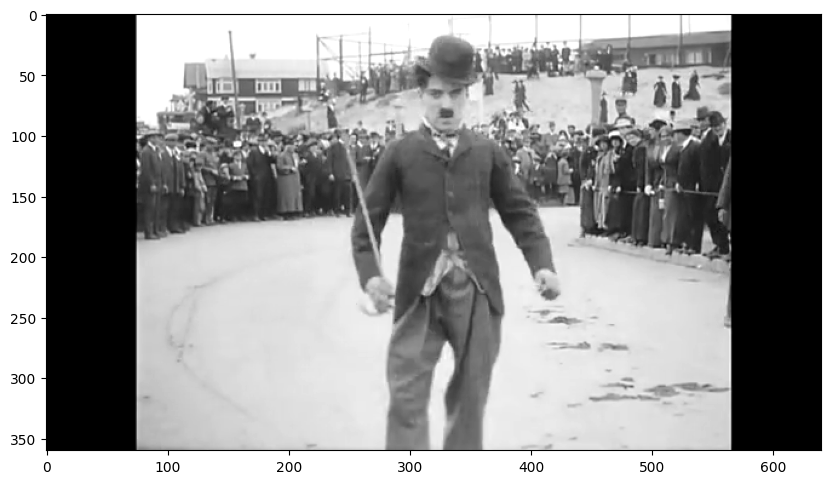

In [12]:
plt.imshow(frame[...,2])

## <font style="color:rgb(50,120,229)">Displaying the frames as video [ For Local only ]</font>

As in the case of an image, we use the [**`cv2.waitKey()`**](https://docs.opencv.org/4.1.0/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7) after [**`cv2.imshow()`**](https://docs.opencv.org/4.1.0/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563) function to pause each frame in the video. In the case of an image, we pass **`0`** to the `waitKey` function, but for playing a video, we need to pass a number greater than `0` to the waitKey() function. This is because `0` would pause the frame in the video for an infinite amount of time and in a video we need each frame to be shown only for some finite interval of time, so we need to pass a number greater than `0` to the `waitKey` function. **This number is equal to the time in milliseconds we want each frame to be displayed.**

#### <font style="color:rgb(50,120,229)">waitKey value for Webcam</font>
While reading the frames from a webcam, using `waitKey(1)` is appropriate because the display frame rate will be limited by the frame rate of the webcam even if we specify a delay of 1 ms in waitKey.

#### <font style="color:rgb(50,120,229)">waitKey value for video file</font>
While reading frames from a video that you are processing, it may still be appropriate to set the time delay to 1 ms so that the thread is freed up to do the processing we want to do.

In rare cases, when the playback needs to be at a certain frame rate, we may want the delay to be higher than 1 ms.

**You should try this with the `videoRead.py` file we have provided.**

In [16]:
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
    
  if ret == True:
    cv2.imshow("Video Output", frame)    
    # Wait for 25 ms before moving on to the next frame
    # This will slow down the video
    cv2.waitKey(25)
    
  # Break the loop
  else: 
    break


#### <font style="color:rgb(200,0,0)">NOTE</font>

Since we are using a Jupyter Notebook, we will use HTML magic command available in Jupyter Notebook to display the video. You can also use the python scripts(`.py` files) which use **`cv2.imshow`** to display the videos in a new window. 

In [17]:
%%HTML
<video controls>
    <source src="https://www.learnopencv.com/wp-content/uploads/2020/08/chaplin.mp4" type="video/mp4">
</video>